### Kaggle: Titanic - Machine Learning from Disaster

Predict survival on the Titanic and get familiar with ML basics.

[Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic)

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [61]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [62]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

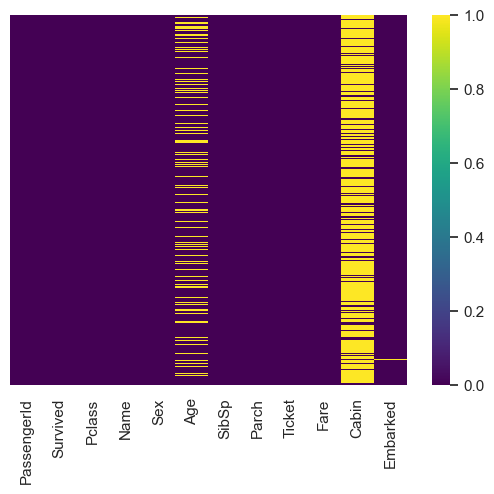

In [63]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=True,cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

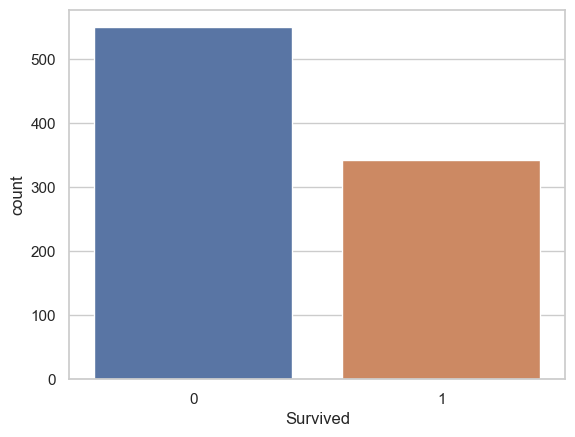

In [64]:
sns.set_theme(style="whitegrid")
#sns.set_theme(style="darkgrid")
sns.countplot(x='Survived', data=df)

In [65]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

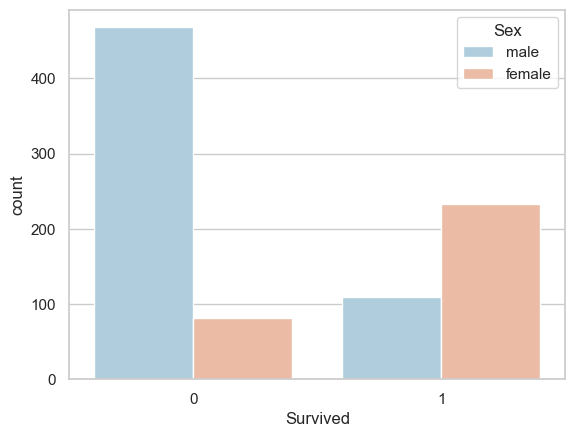

In [66]:
sns.set_theme(style="whitegrid")
sns.countplot(x='Survived', hue='Sex', data=df, palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

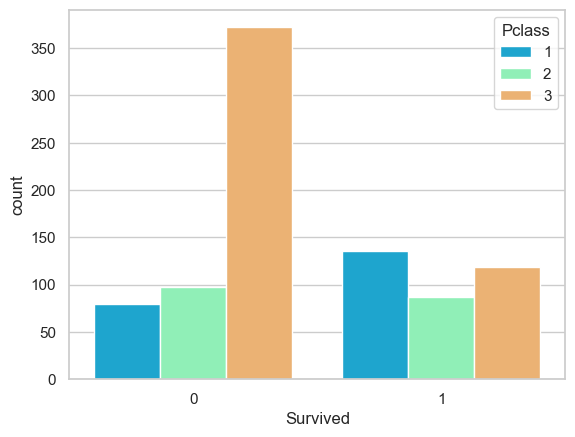

In [67]:
sns.set_theme(style="whitegrid")
sns.countplot(x='Survived', hue='Pclass', data=df, palette='rainbow')

C:\Users\rzn\anaconda3\envs\py311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


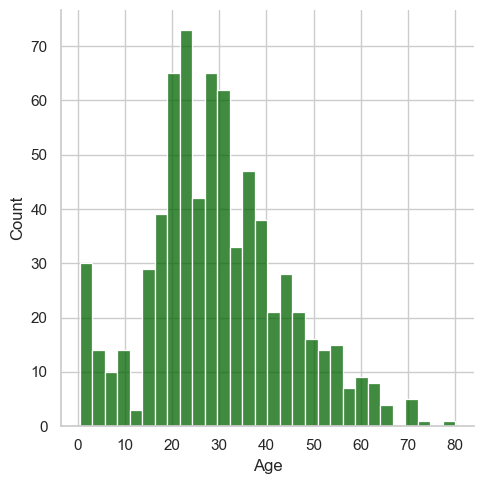

In [68]:
sns.displot(df['Age'].dropna(), kde=False, color='darkgreen',bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

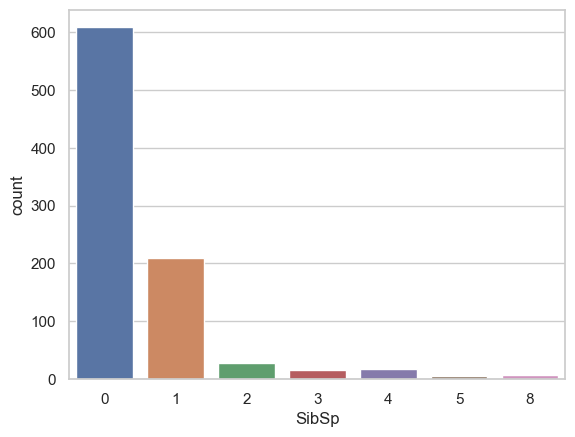

In [69]:
sns.countplot(x='SibSp', data=df)

<Axes: >

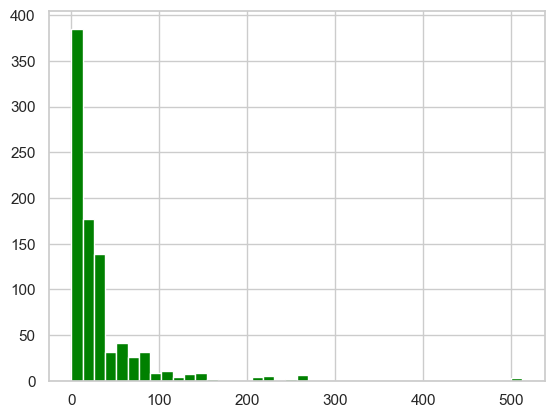

In [70]:
df['Fare'].hist(color='green',bins=40)

C:\Users\rzn\anaconda3\envs\py311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


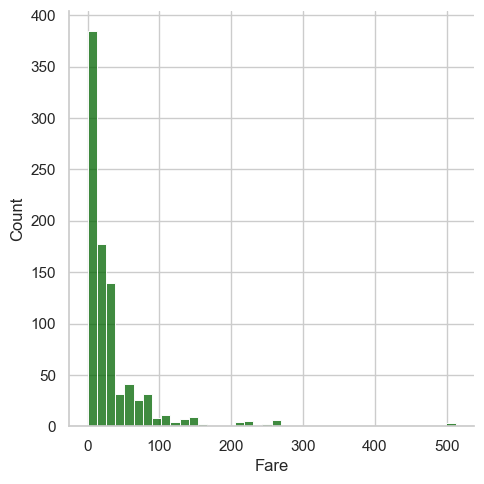

In [71]:
sns.displot(df['Fare'], kde=False, color='darkgreen',bins=40)

### Impute NaN value

<Axes: xlabel='Pclass', ylabel='Age'>

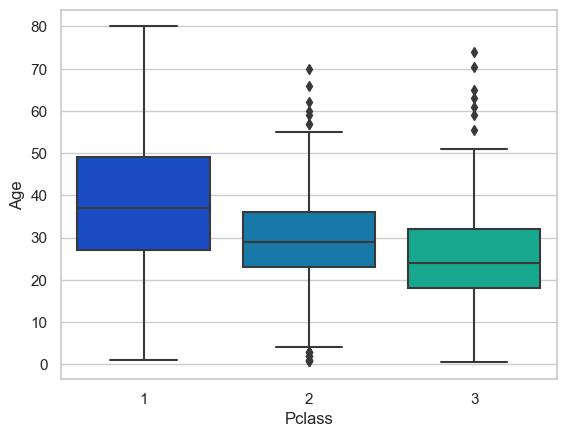

In [72]:
# Set the figure size
#plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', data=df, palette='winter')

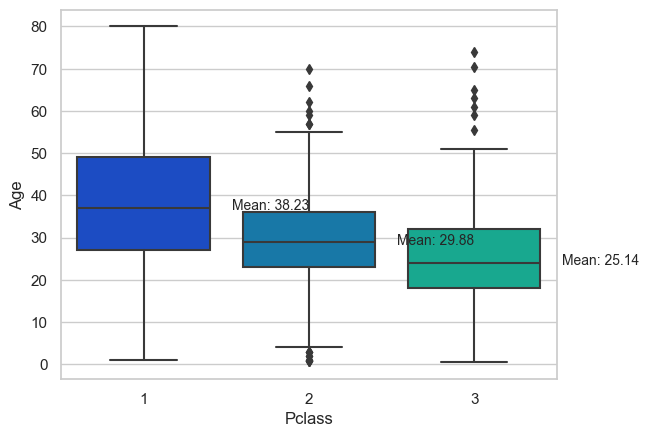

In [73]:
import seaborn as sns
import pandas as pd

# Calculate the mean age for each Pclass
mean_age_per_pclass = df.groupby('Pclass')['Age'].mean()


# Create the boxplot
sns.boxplot(x="Pclass", y="Age", data=df, palette="winter")

# Annotate the mean age for each Pclass above the box
for pclass, mean_age in mean_age_per_pclass.items():
    plt.text(pclass, mean_age + 1, f"Mean: {mean_age:.2f}", ha="right", va="top", fontsize=10)

plt.show()


In [74]:
mean_age_per_pclass

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [75]:
def impute_age(Age,Pclass):      
    if pd.isnull(Age):
        if Pclass ==1:
            return 38
        elif Pclass ==2:
            return 30
        else: 
            return 25
    else: 
        return Age

In [76]:
df1=df

In [77]:
df1['New_Age'] = df1.apply(lambda row:impute_age(row ['Age'], row['Pclass']),axis=1)

In [78]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,New_Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


<Axes: >

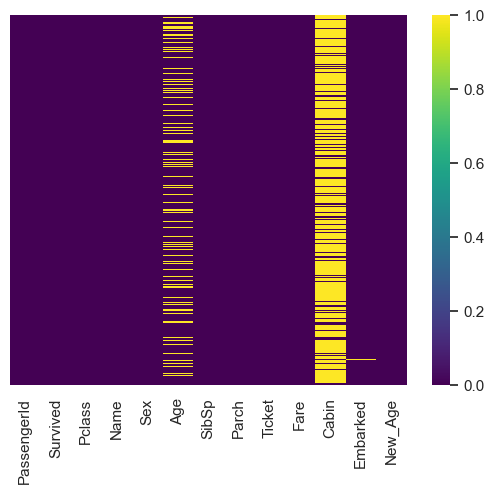

In [79]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [80]:
df2 = df1.drop(['Age', 'Cabin'], axis=1)
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,New_Age
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,35.0


<Axes: >

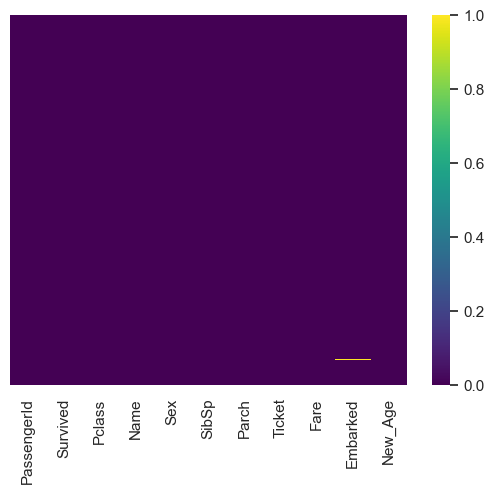

In [81]:
sns.heatmap(df2.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [86]:
df2[df2['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,New_Age
61,62,1,1,"Icard, Miss. Amelie",female,0,0,113572,80.0,NaN,38.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,0,0,113572,80.0,NaN,62.0


In [87]:
df3 = df2.dropna()

<Axes: >

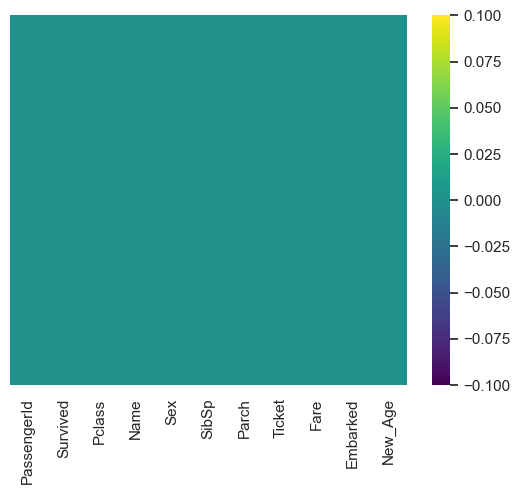

In [88]:
sns.heatmap(df3.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [91]:
df3[df3['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,New_Age
